In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
datajobsUSA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

datajobsUSA = datajobsUSA.dropna(subset=["salary_year_avg"])

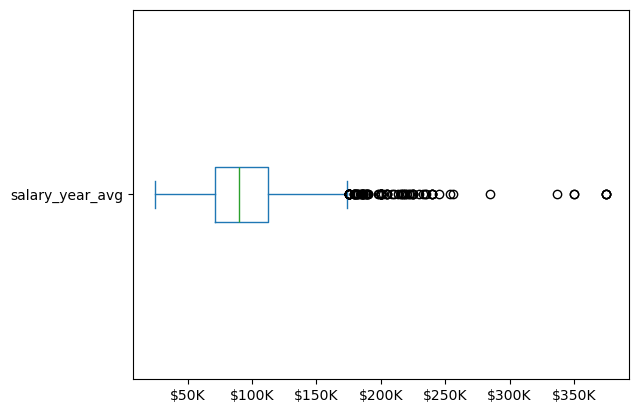

In [4]:
datajobsUSA["salary_year_avg"].plot(kind = "box", vert = False)


ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))



In [8]:
job_titles = ["Data Scientist", "Data Analyst", "Data Engineer"]
datajobs = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United Kingdom')].copy()
datajobs = datajobs.dropna(subset=["salary_year_avg"])

job_list = [datajobs[datajobs["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]

/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_10899/4070792044.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( #just trying seaborn to see if it is easier bro


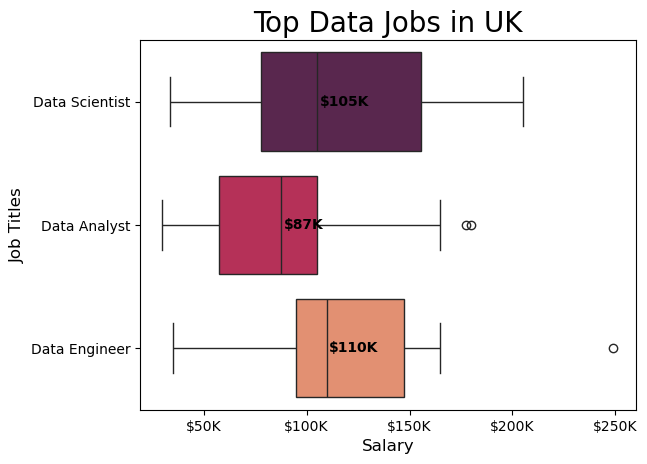

In [9]:




sns.boxplot( #just trying seaborn to see if it is easier bro
    data=datajobs,
    x="salary_year_avg",
    y="job_title_short",
    order=job_titles,
    palette="rocket"  # Try 'Set2', 'coolwarm', 'pastel', etc.
)

# Calculate medians
medians = (
    datajobs.groupby("job_title_short")["salary_year_avg"]
    .median()
    .reindex(job_titles)
)

# Add labels
for i, (job, median) in enumerate(medians.items()):
    plt.text(
        median + 1000,        # move label a bit to the right
        i,                    # vertical position
        f"${int(median/1000)}K",
        va="center",
        fontweight="bold",
        color="black"
    )


ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

plt.title("Top Data Jobs in UK", fontsize= 20)
plt.xlabel("Salary", fontsize = 12)
plt.ylabel("Job Titles", fontsize = 12)
plt.show()